In [1]:
!pip install infomap

     |████████████████████████████████| 266kB 11.6MB/s eta 0:00:01
  Created wheel for infomap: filename=infomap-1.2.1-cp36-cp36m-linux_x86_64.whl size=5737098 sha256=47247163aa28aba7515c7308e2ea8112cc94569497ae7e54c3a10901cbb34e57
  Stored in directory: /home/evan/.cache/pip/wheels/16/56/23/569872ee926fda70528bd88182ba02f7fa4663c97718f9d1e1
Successfully built infomap
You should consider upgrading via the 'pip install --upgrade pip' command.


In [63]:
from infomap import Infomap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [258]:
np.random.choice(np.where(imtest.labels==((imtest.labels[0]+1)%imtest.n_centers))[0])

514

In [237]:
class IMTest():
    def __init__(self, n, in_prob, out_mode='random', n_centers=3, info_map_arg_string='--two-level --directed'):
        self.im = Infomap(info_map_arg_string)
        
        # standard pipeline run during init
        self.make_random_connectivity_data(n, out_prob, in_prob, n_centers=n_centers)
        self.link_data()
        self.plot_data()

    def make_random_connectivity_data(self, n, out_prob, in_prob, n_centers=3):
        self.n_centers = n_centers
        self.data, self.labels = make_blobs(n_samples=n, centers=self.n_centers, n_features=2)
        #self.out_prob =  out_prob
        self.in_prob =  in_prob

        self.connectivity_matrix = np.zeros((n,n))
        self.links = []
        for i in np.random.permutation(np.arange(n)):
            for j in np.random.permutation(np.arange(n)):
                r = np.random.random()
                if (self.labels[i] == self.labels[j] and r<=self.in_prob):
                    self.links.append([i, j])
                    self.connectivity_matrix[i, j] = 1
            
            # check connectivity matrix to make sure node i is connected to at least one other node
            if connectivity_matrix[i].sum()==0:
                # np.random.choice(np.where(self.labels==((self.labels[i]+1)%self.n_centers))[0])  # out of label
                r_in_ix = np.random.choice(np.where(self.labels==(self.labels[i]))[0])  # within label
                self.connectivity_matrix[i, r_in_ix] = 1
            
        if self.out_mode=='random':
            # connect each cluster to another 
        return self.links
    
    
    def get_neighbors(self):
        knn = KNeighborsClassifier(n_neighbors=self.n_centers)
        #knn.ne
    
    
    def link_data(self):
        self.im.add_links(self.links)
        # Run the Infomap search algorithm to find optimal modules
        self.im.run()
        self.n_found_centers = self.im.num_top_modules
        self.codelength = self.im.codelength
        
    
    def plot_data(self):
        plt.figure(figsize=(12, 4))
        plt.subplot(131)
        plt.scatter(self.data[:,0], self.data[:,1], c=self.labels)
        plt.subplot(132)
        plt.imshow(self.connectivity_matrix[np.argsort(self.labels)][:,np.argsort(self.labels)])
        plt.ylabel('N')
        plt.xlabel('N')
        plt.title('True: All Ingroup '+str(self.out_prob*100)+'% Outgroup Connectivity')
        plt.subplot(133)
        plt.scatter(self.data[:,0], self.data[:,1], c=list(self.im.get_modules().values()))
        plt.show()
        

    def cluster(self, mode='im'):
        if mode=='knn':
            #self.knn = KNeighborsClassifier(n_neighbors=self.im.num_top_modules)
            print('KNN soon to be implemented')
        elif mode=='im':
            self.pred_labels = self.im.get_modules()
        else:
            print('Not yet implemented')
            
            
    def score(self):
        pass #for lbl,ct in zip(*np.unique(self.labels, return_counts=True)):
            
    


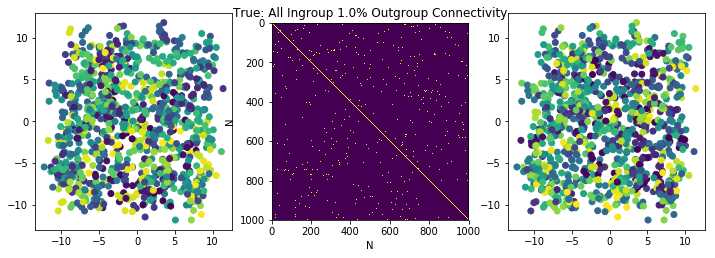

In [293]:
imtest = IMTest(n=1000, out_prob=0.01, in_prob=1, n_centers=200)  # would be better to link closest cells from other groups

In [294]:
imtest.codelength

9.292606173724899

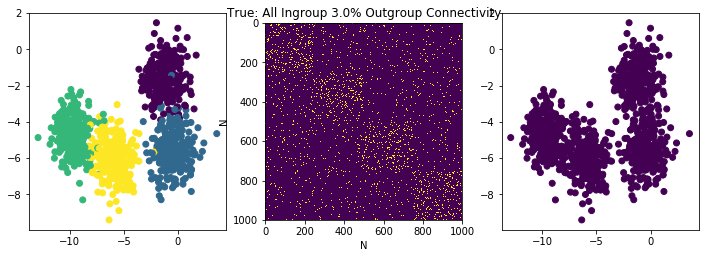

In [219]:
imtest = IMTest(n=1000, out_prob=0.03, in_prob=0.1, n_centers=4)  # would be better to link closest cells from other groups

ValueError: 'c' argument has 875 elements, which is not acceptable for use with 'x' with size 1000, 'y' with size 1000.

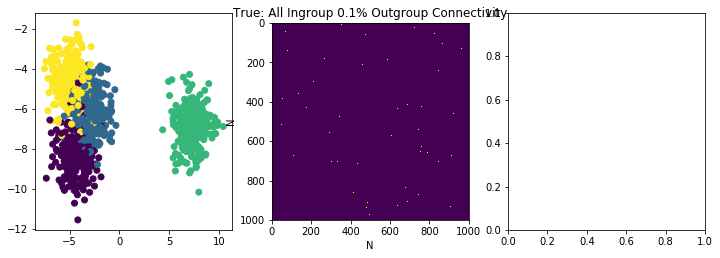

In [252]:
imtest = IMTest(n=1000, out_prob=0.001, in_prob=0, n_centers=4)  # would be better to link closest cells from other groups

In [254]:
# inprob=1 and outprob is as low as you can go but still fully connected (just specify one connection) and check different codelengths
# in general just create graphs where you have a strong expectationabout the codelength

In [ ]:
# try to see if you can calculate mutual information between position and type
# calculate the codelength for the permuted and paired:
    # permute cell types but keep graph structure the same
    # generate paired cell types 
# generate data based on multivariate gaussians so that you can compare to empirical mutual information